<a href="https://colab.research.google.com/github/Charishma1049/Amazon-Sales-Report/blob/main/Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# =========================================
# STEP 1: Import Libraries
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files

# For better visualization
plt.style.use('ggplot')
sns.set_palette("Set2")

In [16]:
# =========================================
# STEP 2: Load Dataset
# =========================================
url = "https://raw.githubusercontent.com/Charishma1049/Amazon-Sales-Report/main/Amazon%20Sale%20Report.csv"
# If the file is not comma-separated, you might need to specify the delimiter, e.g., sep=';'
df = pd.read_csv(url, encoding='latin1')

print("Shape of dataset:", df.shape)
print("\nColumns in dataset:\n", df.columns)
print("\nFirst 5 rows:\n", df.head())

Shape of dataset: (128976, 21)

Columns in dataset:
 Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

First 5 rows:
    index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Am

In [17]:
# =========================================
# STEP 3: Data Cleaning
# =========================================
# Drop duplicates
df.drop_duplicates(inplace=True)

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Convert Date
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Convert Amount and Qty
if 'Amount' in df.columns:
    df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
if 'Qty' in df.columns:
    df['Qty'] = pd.to_numeric(df['Qty'], errors='coerce')

# Drop rows with nulls in key columns
important_cols = ['Order ID', 'Date', 'Amount']
df.dropna(subset=important_cols, inplace=True)

# Create new columns for Year & Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

print("\n✅ Data Cleaning Completed. Shape:", df.shape)



Missing Values:
 index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7789
Amount                  7789
ship-city                 33
ship-state                33
ship-postal-code          33
ship-country              33
B2B                        0
fulfilled-by           89595
New                   128808
PendingS              128808
dtype: int64

✅ Data Cleaning Completed. Shape: (121019, 23)


/tmp/ipython-input-840623228.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')



📊 Sales Overview:
Total Sales: ₹78,496,786.39
Total Orders: 112887
Total Quantity Sold: 116329


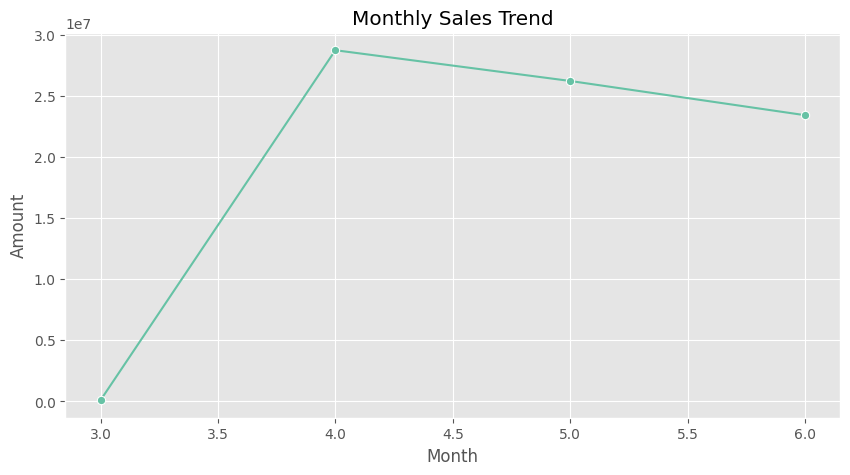

In [18]:
# =========================================
# STEP 4: Sales Overview
# =========================================
print("\n📊 Sales Overview:")

# Total Sales, Orders, Quantity
total_sales = df['Amount'].sum()
total_orders = df['Order ID'].nunique()
total_qty = df['Qty'].sum()

print(f"Total Sales: ₹{total_sales:,.2f}")
print(f"Total Orders: {total_orders}")
print(f"Total Quantity Sold: {total_qty}")

# Sales Trend Over Time
sales_trend = df.groupby('Month')['Amount'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=sales_trend, x='Month', y='Amount', marker="o")
plt.title("Monthly Sales Trend")
plt.show()


📊 Product Analysis:


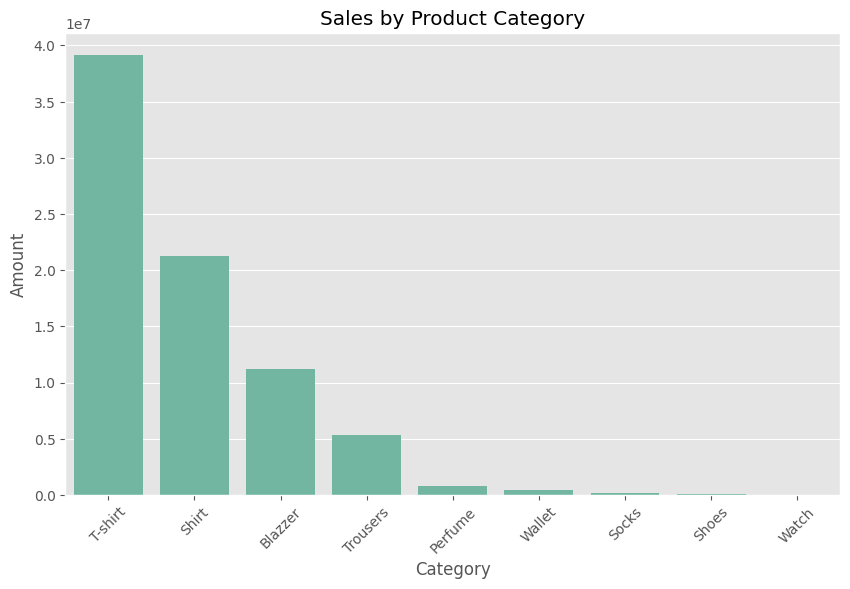

In [19]:
# =========================================
# STEP 5: Product Analysis
# =========================================
print("\n📊 Product Analysis:")

# Sales by Category
if 'Category' in df.columns:
    category_sales = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).reset_index()
    plt.figure(figsize=(10,6))
    sns.barplot(data=category_sales, x='Category', y='Amount')
    plt.title("Sales by Product Category")
    plt.xticks(rotation=45)
    plt.show()

# Top 10 Products by Sales
if 'SKU' in df.columns:
    top_products = df.groupby('SKU')['Amount'].sum().sort_values(ascending=False).head(10).reset_index()
    plt.figure(figsize=(10,6))
    sns.barplot(data=top_products, x='SKU', y='Amount')
    plt.title("Top 10 Best-Selling Products")
    plt.xticks(rotation=45)
    plt.show()



📊 Fulfillment Analysis:


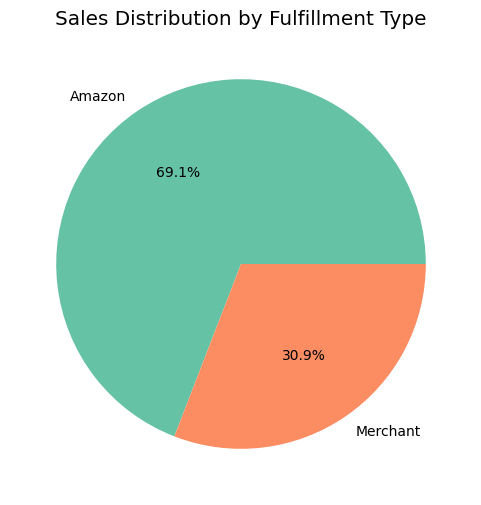

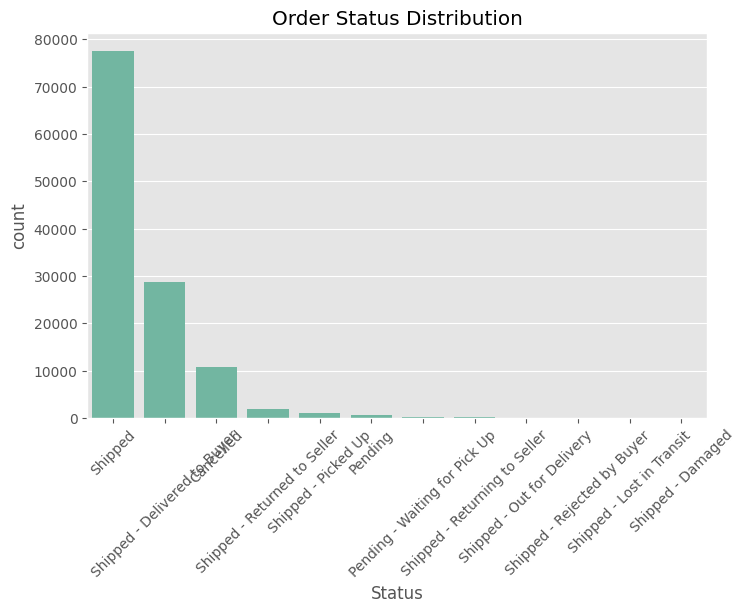

In [20]:
# =========================================
# STEP 6: Fulfillment Analysis
# =========================================
print("\n📊 Fulfillment Analysis:")

if 'Fulfilment' in df.columns:
    fulfilment_sales = df.groupby('Fulfilment')['Amount'].sum().reset_index()
    plt.figure(figsize=(6,6))
    plt.pie(fulfilment_sales['Amount'], labels=fulfilment_sales['Fulfilment'], autopct='%1.1f%%')
    plt.title("Sales Distribution by Fulfillment Type")
    plt.show()

# Order Status Breakdown
if 'Status' in df.columns:
    status_counts = df['Status'].value_counts().reset_index()
    plt.figure(figsize=(8,5))
    sns.barplot(data=status_counts, x='Status', y='count')
    plt.title("Order Status Distribution")
    plt.xticks(rotation=45)
    plt.show()


📊 Customer Segmentation:


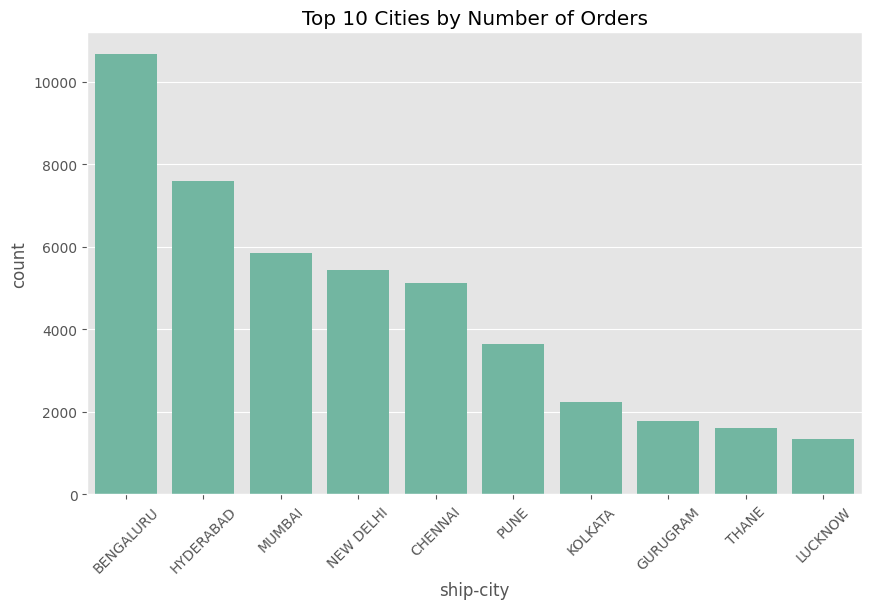


Top 10 Customers by Sales (Based on Postal Code):
      ship-postal-code     Amount
791           201301.0  645309.05
109           122001.0  452296.57
4739          560068.0  386296.00
4708          560037.0  383603.48
4747          560076.0  352416.61
4714          560043.0  298109.06
4771          560100.0  296519.34
2476          401107.0  293971.45
4737          560066.0  290099.15
3745          500072.0  277719.27


In [21]:
# =========================================
# STEP 7: Customer Segmentation
# =========================================
print("\n📊 Customer Segmentation:")

if 'ship-city' in df.columns:
    customer_city = df['ship-city'].value_counts().head(10).reset_index()
    plt.figure(figsize=(10,6))
    sns.barplot(data=customer_city, x='ship-city', y='count')
    plt.title("Top 10 Cities by Number of Orders")
    plt.xticks(rotation=45)
    plt.show()

# RFM Analysis (if customer info is available)
if 'ship-postal-code' in df.columns:
    customer_sales = df.groupby('ship-postal-code')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False).head(10)
    print("\nTop 10 Customers by Sales (Based on Postal Code):")
    print(customer_sales)


📊 Geographical Analysis:


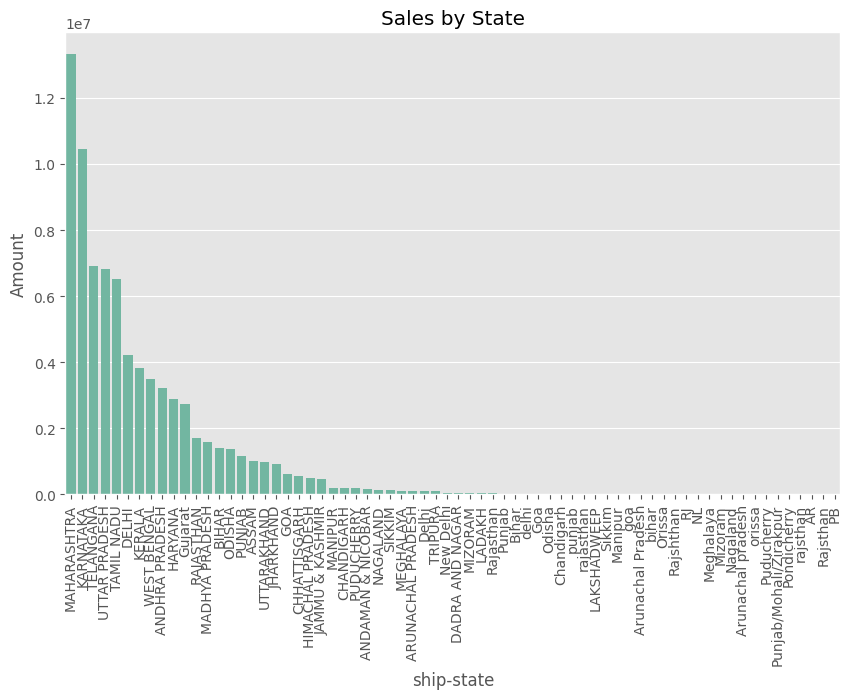

In [22]:
# =========================================
# STEP 8: Geographical Analysis
# =========================================
print("\n📊 Geographical Analysis:")

if 'ship-state' in df.columns:
    state_sales = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).reset_index()
    plt.figure(figsize=(10,6))
    sns.barplot(data=state_sales, x='ship-state', y='Amount')
    plt.title("Sales by State")
    plt.xticks(rotation=90)
    plt.show()

In [23]:
# =========================================
# STEP 9: Insights & Recommendations
# =========================================
print("\n📌 Key Insights & Recommendations:")

print("""
1. Sales Overview:
   - Peak sales months indicate seasonal demand.
   - Consider running promotions during high-sales months to maximize revenue.

2. Product Insights:
   - Top categories and products drive most revenue.
   - Optimize inventory for these items to prevent stockouts.

3. Fulfillment:
   - If FBA is stronger → promote Prime products.
   - If MFN delays occur → invest in logistics improvements.

4. Customer & Geography:
   - Focus marketing efforts on top-performing states & cities.
   - Launch targeted ads or discounts in underperforming regions.

5. Business Strategy:
   - Introduce loyalty programs to retain repeat customers.
   - Diversify product range in weaker categories.
""")


📌 Key Insights & Recommendations:

1. Sales Overview:
   - Peak sales months indicate seasonal demand.
   - Consider running promotions during high-sales months to maximize revenue.

2. Product Insights:
   - Top categories and products drive most revenue.
   - Optimize inventory for these items to prevent stockouts.

3. Fulfillment:
   - If FBA is stronger → promote Prime products.
   - If MFN delays occur → invest in logistics improvements.

4. Customer & Geography:
   - Focus marketing efforts on top-performing states & cities.
   - Launch targeted ads or discounts in underperforming regions.

5. Business Strategy:
   - Introduce loyalty programs to retain repeat customers.
   - Diversify product range in weaker categories.

